# Classification (14 points):
Each item worth 2 points, except item 6 which is worth 4 points.

For each question that asks to implement a function, implement it in the top cell where it is defined and then execute the function in the code cell provided below the question. <br>
You should base your answers on the output.<br>
You are allowed to implement and use additional functions. These would be defined and implemented in the
cell directly below the questions they were implemented for.

All the textual answers should be based on and justified with output from the data in the code cell above.<br>
For example, if the question asks about the correlation value, the code calculating it should appear above the answer, and the value should be in the output.
The answers should be concise and written in your own words.


### <span style="color:red">Do Not Modify the Structure of this Notebook, don't add/remove/move cells or change their type (Code/Markdown) </span>

1. [Read the feather file 'TrainQuestionsDF.feather.zstd' into a pandas dataframe. <br>Use the function train_test_split to split the data into two sets, 75% for training and 25% for validation. <br> Generate stratified samples with the *random_state=RANDOM_SEED*.](#q1)
<br><br>
2. [Implement the function `fit_tree_classifier(X, y)`, then use it to fit a decision tree classifier on the train dataset and generate prediction for the validation data set. <br>Use only the numerical columns as features (you can use the function from DataExploration).](#q2)
<br><br>
3. [Implement the function `evaluate_classification(y_true, y_predicted)`, then use it to evaluate the classification made by the decision tree classifier on the validation dataset.](#q3)
<br><br>
4. [Implement the function `fit_knn_classifier(X, y)` and use it to fit the model on the train data and then generate prediction for the validation data. Using the previous evaluation.](#q4)
<br><br>
5. [Now we turn to a different features set, we will utilize the text in the Title field of each sample to generate a features vector for the sample. <br> You should apply the TfidfVectorizer to generate tf-idf (term frequency-inverse document frequency) features from the text in the Title field of each sample. <br>Make sure to use the same vocabulary for both the training set and the validation. The vocabulary size determines the vector size, each entry in the vector represents the tf-idf value for the corresponding term. <br> Implement the function `series_to_tfidf(sr)`, then generate tf-idf vectors for the training and validation sets and train two classifiers (decision tree and knn) using the generated vectors.](#q5)
<br><br>
6. [Using the documentation for the two classification and the text feature extraction models and their different parameters. <br>Find a combination of parameters that improves the accuracy for each model, and for at least one of the models the improvement should be by at least 5% on the validation dataset. <br>Write your code below and describe the changes you made and the intuition behind them. <br>For applying a systematic search, i.e. not just manually checking for different parameters.](#q6)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# TODO: Any additional (if needed) import statements should be in this cell
import pyarrow.feather as feather
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [3]:
# TODO: Set the random seed as your student id (only numbers)
RANDOM_SEED = 3891013
np.random.seed(RANDOM_SEED)

In [4]:
# This cell is for functions given to you to use
def read_feather_to_df(feather_file_name):
    """
    The function expects to receive a path to feather file,
    it will read the file from the disk into a pandas dataframe
    :param feather_file_name: a string or path like object
    :return: pd.DataFrame
    """
    feather.read_feather(feather_file_name)
    return pd.read_feather(feather_file_name)

In [5]:
# This cell is for all the functions you are expected to implement.
# You should implement them here and only call them below when they are mentioned in a question.

def select_numeric_non_id_columns(df):
    """
    Return a subset of a DataFrame’s columns based on the column dtypes,
    including only numerical columns and excluding columns with the string id (case-insensitive) in their name
    :param df: pd.DataFrame
    :return: pd.DataFrame
    """
    # TODO: write your code here
    numerical_df = pd.DataFrame()
    for x in df:
        c = df[x].dtypes
        if c == "Int64":
            if x != "Id" and x != "PostTypeId" and x != "AcceptedAnswerId" and x != "OwnerUserId" and x != "LastEditorUserId" and x != "ParentId":
               numerical_df[x] = df[x]   
    return numerical_df

def fit_tree_classifier(X, y, **decisiontree_kwargs):
    """
    The function receives a multidimensional array or a dataframe of features as X and one dimensional array or pandas Series as y.
    It creates a DecisionTreeClassifier classifier with random_state=RANDOM_SEED, fits it on X and y and returns the fitted classifier.
    :param X: ndarray, pd.DataFrame or a sparse matrix; data features
    :param y: array-like; data class labels
    :param decisiontree_kwargs: key-word arguments that will be passed to DecisionTreeClassifier class
    :return: a fitted DecisionTreeClassifier object
    """
    # TODO: write your code here
#     clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5) # instantiate decision tree classifier
    clf = DecisionTreeClassifier(**decisiontree_kwargs)
    fit = clf.fit(X, y) # train
    return fit


def fit_knn_classifier(X, y, **knn_kwargs):
    """
    The function receives a multidimensional array or a dataframe of features as X, on dimensional array or pandas Series as y.
    It creates a DecisionTreeClassifier classifier with random_state=RANDOM_SEED, fits it on X and y and returns the fitted classifier.
    :param X: ndarray, pd.DataFrame or a sparse matrix; data features
    :param y: array-like; data class labels
    :param knn_kwargs: key-word arguments that will be passed to KNeighborsClassifier class
    :return: a fitted KNeighborsClassifier object
    """
    # TODO: write your code here
    clf = KNeighborsClassifier(**knn_kwargs)
    fit = clf.fit(X, y) # train the model
    return fit


def evaluate_classification(y_true, y_predicted):
    """
    The function receives two arrays or pandas Series with the same length, the actual labels and the predicted labels.
    It then prints the sklearn classification_report and plots a confusion matrix as a heatmap using the class ConfusionMatrixDisplay.
    The plot should be readable (e.g. not overlapping labels or too small text)
    :param y_true: array-like; ground truth data class labels
    :param y_predicted: array-like; predicted data class labels
    """
    # TODO: write your code here
    accuracy = accuracy_score(y_true, y_predicted)
    cm = confusion_matrix(y_true, y_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.unique(y_true)) 
    return accuracy, disp
    


def series_to_tfidf(sr, **tfidfvectorizer_kwargs):
    """
    The function receives an array or a pandas Series that contains text strings (a.k.a documents).
    It then converts the documents into a matrix of TF-IDF features
    The function should return two objects:
    TfidfVectorizer object after it learned (fitted) the vocabulary and idf from the training set,
    and a document-term matrix (the original documents array transformed into a TF-IDF features matrix).
    :param sr: pd.Series, contains text strings
    :param tfidfvectorizer_kwargs: key-word arguments that will be passed to TfidfVectorizer class
    :return: two objects, the fitted TfidfVectorizer object and the tf-idf document-term sparse matrix
    """
    # TODO: write your code here
    vectorizer = TfidfVectorizer()
    TfidfVectorizer_object = vectorizer.fit(sr)
    sparse_matrix = vectorizer.fit_transform(sr)
    return TfidfVectorizer_object, sparse_matrix

### <a name="q1"></a> 1. Read the feather file 'TrainQuestionsDF.feather.zstd' into a pandas dataframe. <br>Use the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data into two sets, 75% for training and 25% for validation. <br> Generate stratified samples with the **random_state=RANDOM_SEED**.

In [6]:
# TODO: write your function calls and code here
df = read_feather_to_df("TrainQuestionsDF.feather.zstd")
# train, test = train_test_split(select_numeric_non_id_columns(df), test_size=0.25, random_state = RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split((df), df['Label'], test_size=0.25, random_state=RANDOM_SEED)

### <a name="q2"></a> 2. Implement the function `fit_tree_classifier(X, y, **decisiontree_kwargs)`, then use it to fit a decision tree classifier on the train dataset and generate prediction for the validation data set. Make sure to set **random_state=RANDOM_SEED** within the function. <br>Use only the numerical columns as features and print the labels of the first 5 predictions (you can use the function from DataExploration).

In [7]:
# TODO: write your function calls and code here
y_pred = fit_tree_classifier(select_numeric_non_id_columns(X_train), y_train, random_state=RANDOM_SEED).predict(select_numeric_non_id_columns(X_test))
print("First 5 predictions: ", y_pred[:5])

First 5 predictions:  ['bayesian' 'time-series' 'logistic' 'logistic' 'hypothesis-testing']


### <a name="q3"></a> 3. Implement the function `evaluate_classification(y_true, y_predicted)`, then use it to evaluate the classification made by the decision tree classifier on the validation dataset.<br>3.1 For which label did the model achieve the best result, and how many samples were classified correctly for that label? <br>3.2 How many samples with the label 'bayesian' were classified as 'time-series'? <br>3.3 Was the model successful?

Accuracy:  0.15781458214353702


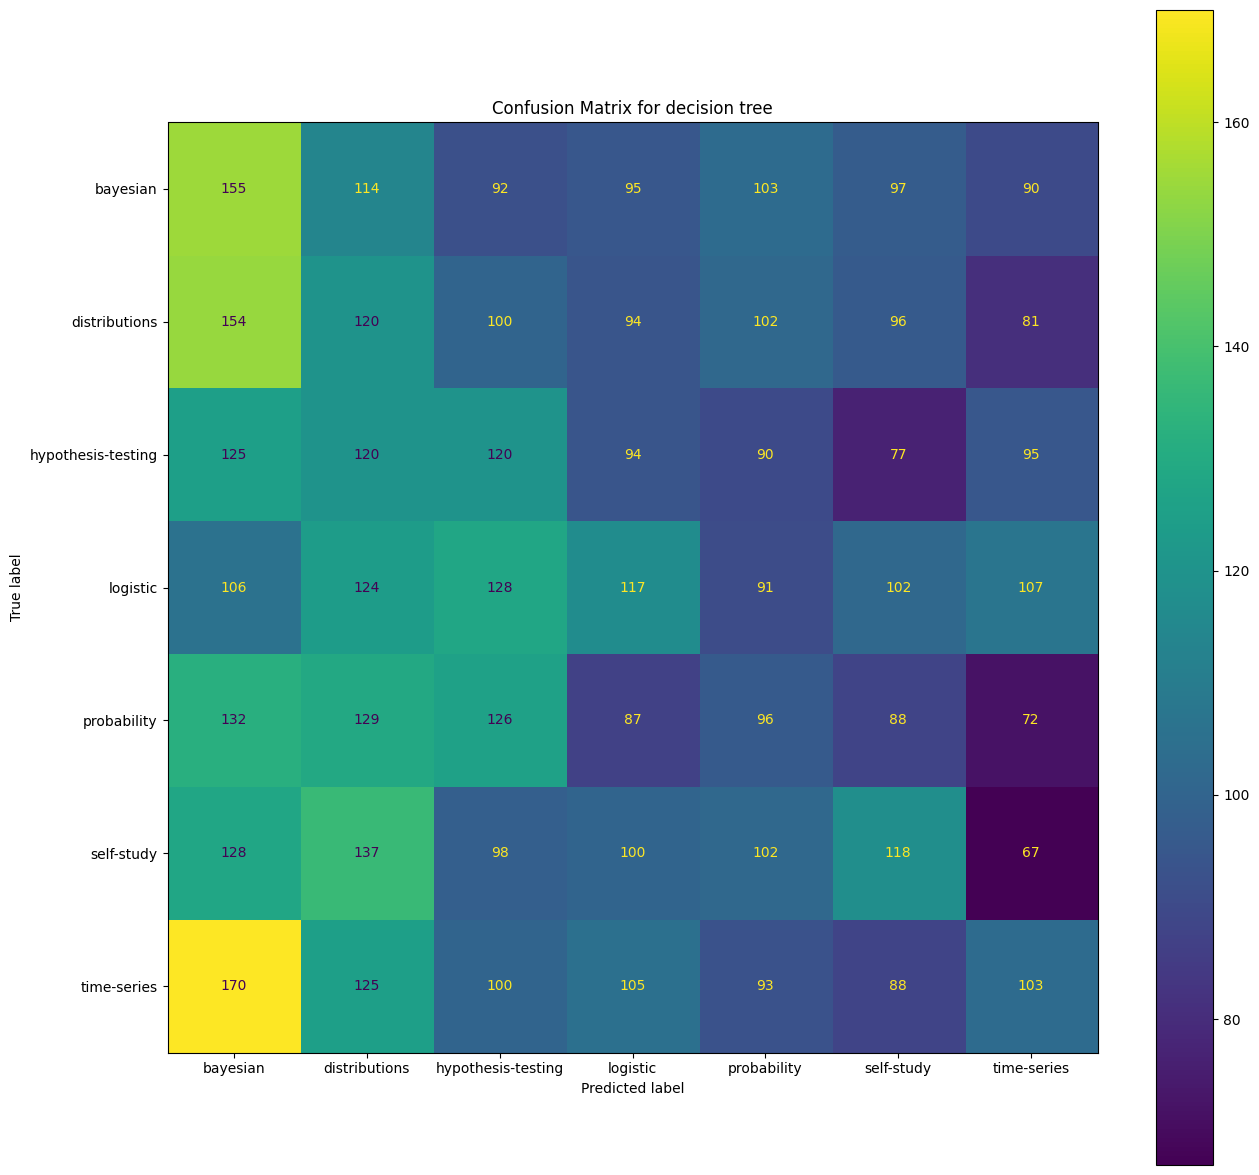

In [13]:
# TODO: write your function calls and code here
print("Accuracy: ", evaluate_classification(y_test, y_pred)[0])
fig, ax = plt.subplots(figsize=(15,15))
evaluate_classification(y_test, y_pred)[1].plot(ax=ax)
plt.title("Confusion Matrix for decision tree")
plt.show()

*Write your answers to 3 here (1-2 sentences per item):*<br>
3.1) For the label 'bayesian' model produced best result as according to confusion matrix above, model predicted label 'bayesian' 155 times correctly as bayesian.<br>
3.2) According to confusion matrix above, the model predicted 90 times label 'bayesian' as 'time-series'.<br>
3.3) Looking at the confusion matrix and accuracy(0.15), we can say that model was not that successful as it predicted many labels incorrectly for example, model predicted label 'bayesian' as 'time-series' 170 times. 
    

### <a name="q4"></a> 4. Implement the function `fit_knn_classifier(X, y)` and use it to fit the model on the train data and then generate prediction for the validation data. Using the previous evaluation answer the following questions: <br>4.1 Which model achieved higher accuracy on the validation set? <br>4.2 Can you identify a bias towards a certain class in the result?

Accuracy:  0.15419760137064534


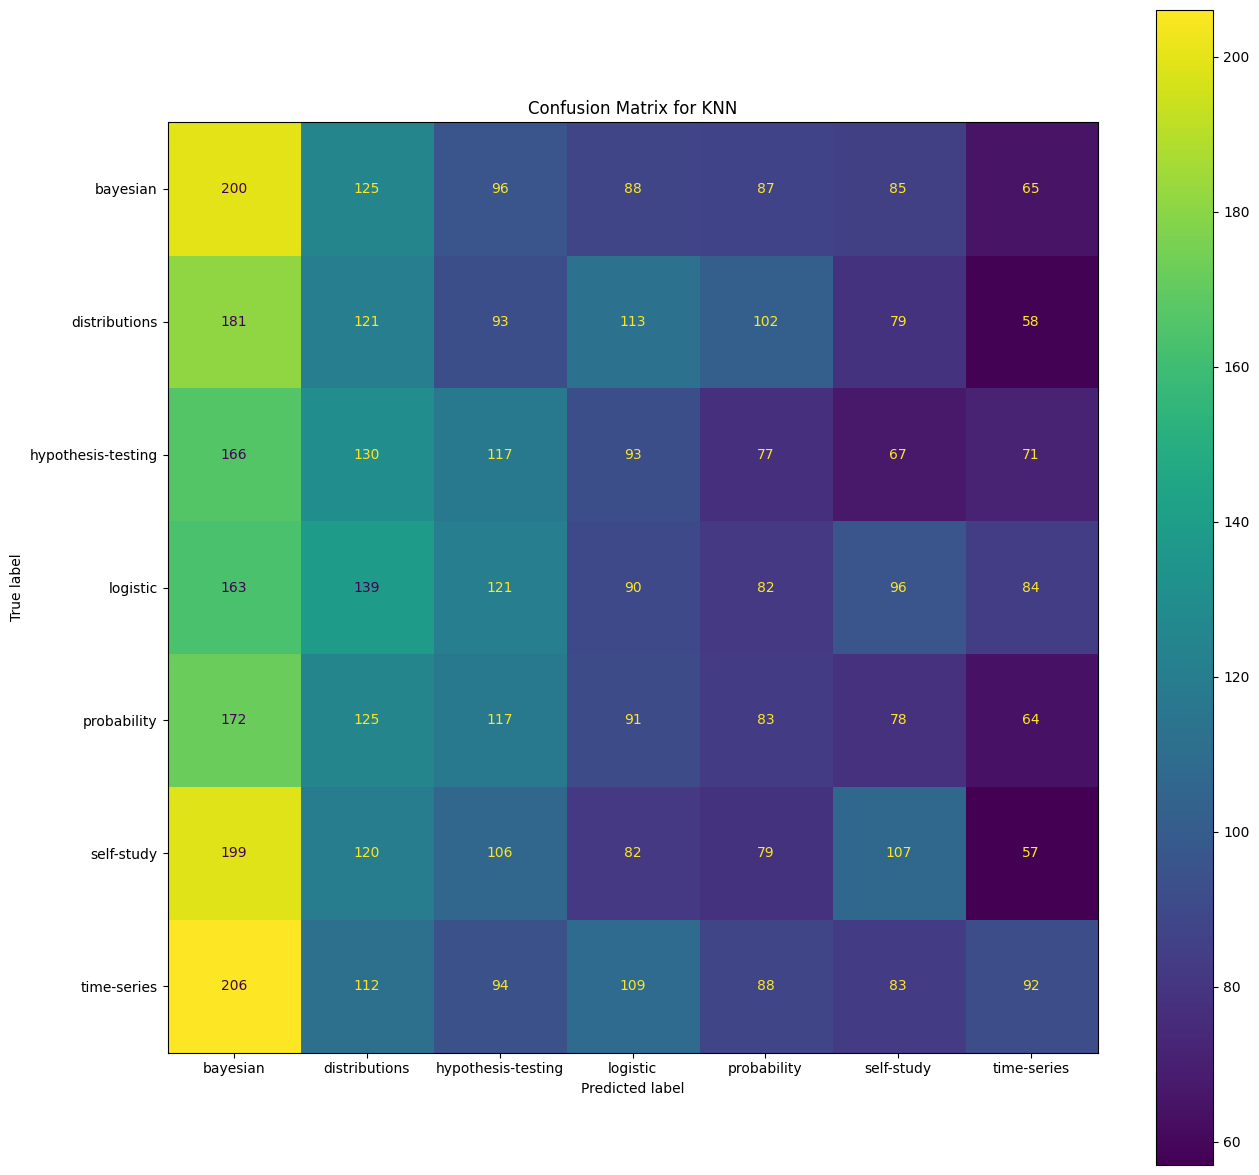

In [9]:
# TODO: write your function calls and code here
y_pred_knn = fit_knn_classifier(select_numeric_non_id_columns(X_train), y_train).predict(select_numeric_non_id_columns(X_test))
print("Accuracy: ", evaluate_classification(y_test, y_pred_knn)[0])
fig, ax = plt.subplots(figsize=(15,15))
evaluate_classification(y_test, y_pred_knn)[1].plot(ax=ax)
plt.title("Confusion Matrix for KNN")
plt.show()

*Write your answers to 4 here (1-2 sentences per item):*<br>
4.1) decision tree produced higher accuracy(0.15) on validation set. <br>
4.2) If we consider both KNN and decision tree models, there is a higher bias towards label 'bayesian' as it was predicted 206 times incorrectly in case of KNN and 170 times in case of decision tree which is highest among all the wrong predicted labels. Also, if we look at first columns of both confusion matrices, we can see that almost all the labels were predicted as 'bayesian' most number of times among the incorrectly predicted ones. Thus we can conclude that there is a higher bias towards label 'bayesian'. 

### <a name="q5"></a> 5. Now we turn to a different features set, we will utilize the text in the Title field of each sample to generate a features vector for the sample. <br> You should apply the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to generate tf-idf (term frequency-inverse document frequency) features from the text in the Title field of each sample. <br>Make sure to use the same vocabulary for both the training set and the validation. The vocabulary size determines the vector size, each entry in the vector represents the tf-idf value for the corresponding term. <br> Implement the function `series_to_tfidf(sr, **tfidfvectorizer_kwargs)`, then generate tf-idf vectors for the training and validation sets and train two classifiers (decision tree and knn) using the generated vectors. Answer the following questions:<br>5.1 Which model achieves higher accuracy on the validation set? <br>5.2 For each model specify the label it gets most correct and most incorrect prediction for.

Accuracy tfidf tree:  0.5926137445269369
Accuracy tfidf KNN:  0.5345516847515706


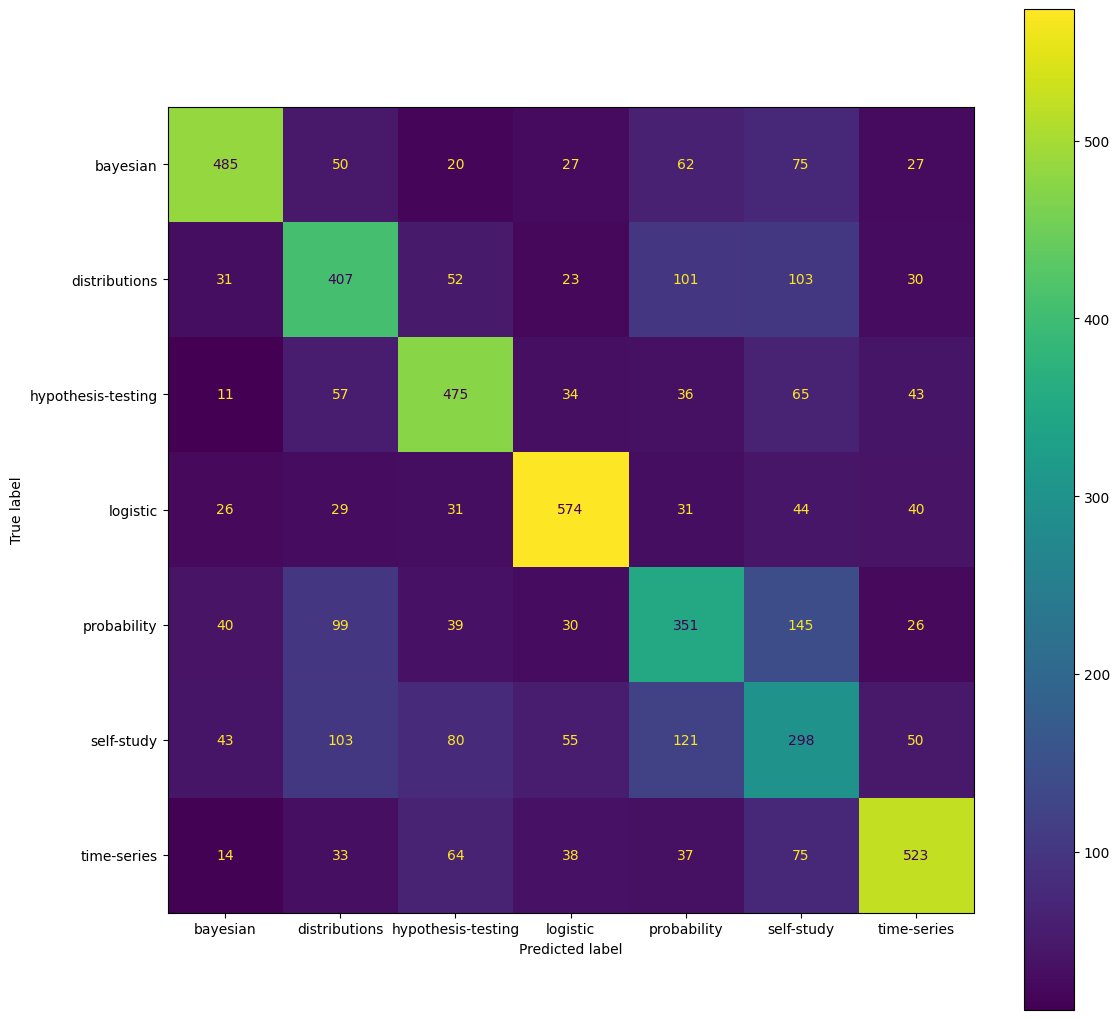

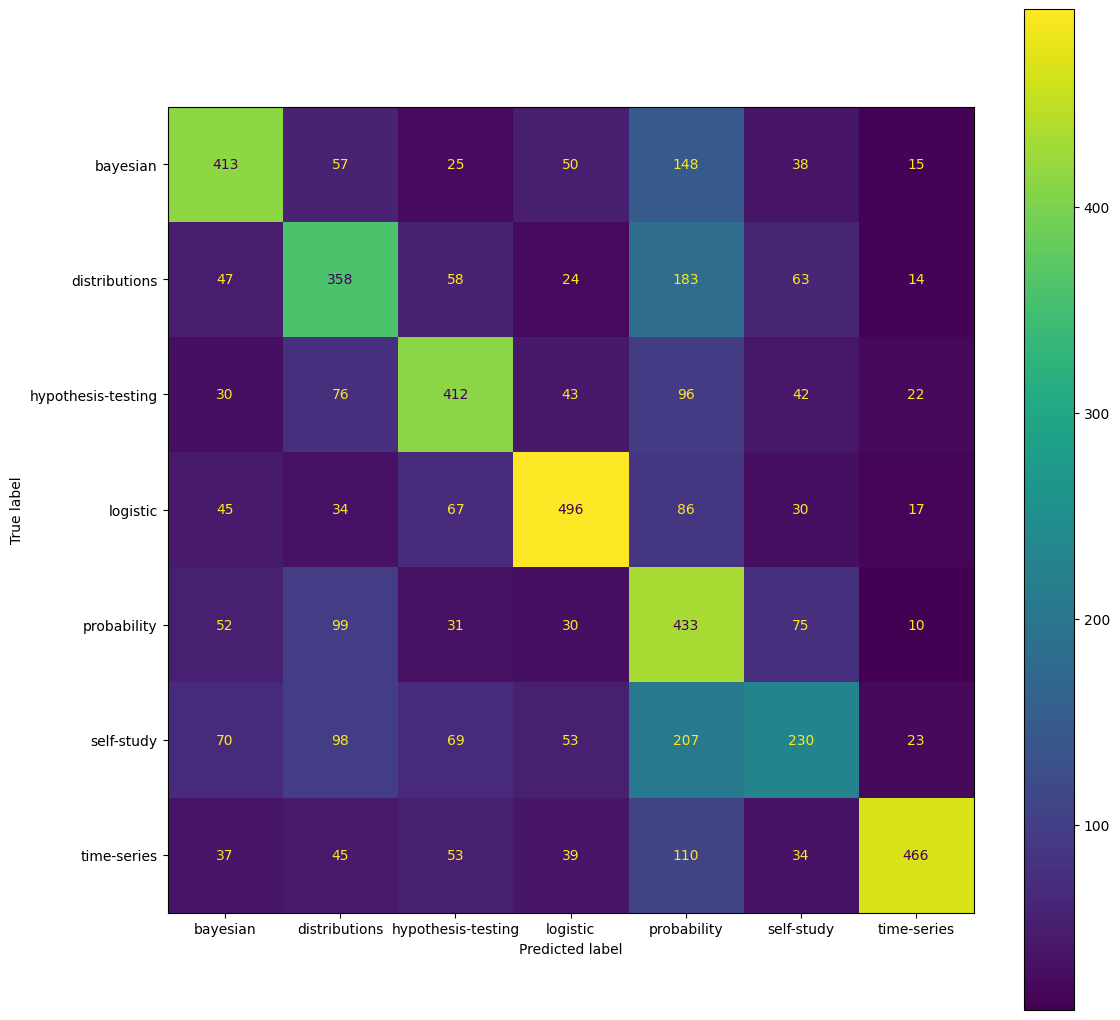

In [10]:
# TODO: write your function calls and code here
X_train_vector = series_to_tfidf(df['Title'])[0].transform(X_train['Title'])
X_test_vector = series_to_tfidf(df['Title'])[0].transform(X_test['Title'])
y_pred_tfidf_tree = fit_tree_classifier(X_train_vector, y_train).predict(X_test_vector)
y_pred_tfidf_KNN = fit_knn_classifier(X_train_vector, y_train).predict(X_test_vector)
print("Accuracy tfidf tree: ", evaluate_classification(y_test, y_pred_tfidf_tree)[0])
print("Accuracy tfidf KNN: ", evaluate_classification(y_test, y_pred_tfidf_KNN)[0])
fig, ax = plt.subplots(figsize=(13,13))
evaluate_classification(y_test, y_pred_tfidf_tree)[1].plot(ax=ax)
fig, ax = plt.subplots(figsize=(13,13))
evaluate_classification(y_test, y_pred_tfidf_KNN)[1].plot(ax=ax)
plt.show()

# X_train_vectors.shape # Shape: (15758, 7441)
# X_test_vectors.shape


*Write your answers to 5 here (1-2 sentences per item):*<br>
5.1) Decision tree achieved higher accuracy at 0.59 on validation set. <br><br>
5.2) For decision tree, most correctly predicted label is 'logistic' whereas most incorrectly predicted label is 'probability' which is predicted as 'self-study' 134 times. <br>
For KNN, most correctly predicted label is also 'logistic'whereas most incorrectly predicted label is 'self-study' which is predicted as 'probablity' 207 times.

### <a name="q6"></a> 6. Using the documentation for the two classification and the text feature extraction models and their different parameters. <br>Find a combination of parameters that improves the accuracy for each model, and for at least one of the models the improvement should be by at least 5% on the validation dataset. <br>Write your code below and describe the changes you made and the intuition behind them. <br>1 point will be awarded for applying a systematic search, i.e. not just manually checking different values for different parameters.

In [11]:
# TODO: write your function calls and code here
# Identifying optimal K value for KNN classification
# X_train_vector_scaled.shape shape: (15758, 8482)
# acc = []
# for i in range(1,125):
#     y_pred_tfidf_KNN = fit_knn_classifier(X_train_vector, y_train, n_neighbors=i).predict(X_test_vector)
#     print("Accuracy tfidf KNN after scaling at k = : ",i, " is ", evaluate_classification(y_test, y_pred_tfidf_KNN)[0])
#     accuracy = evaluate_classification(y_test, y_pred_tfidf_KNN)[0]
#     acc.append(accuracy)

# plt.figure(figsize=(10,6))
# plt.plot(range(1,125),acc,color='blue', linestyle='dashed', 
#          marker='o',markerfacecolor='red', markersize=10)
# plt.title('Accuracy vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Accuracy')
# print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
# Maximum accuracy:- 0.6535313154387968 at K = 118

y_pred_tfidf_KNN = fit_knn_classifier(X_train_vector, y_train, n_neighbors=118).predict(X_test_vector)
print("Accuracy tfidf KNN after tuning K value: ", evaluate_classification(y_test, y_pred_tfidf_KNN)[0])

Accuracy tfidf KNN after tuning K value:  0.6516276413478013


In [12]:
# estimator = DecisionTreeClassifier()
# param_grid={'criterion':['gini', 'entropy'],
#             'max_depth':[50,60,70,80,90,100],
#             'min_samples_leaf':range(1,10), 
#             'min_samples_split':range(1,10), 
#            'max_features':[1.0],#,0.3]#,0.1] 
#            } 


# grid = GridSearchCV(estimator, param_grid=param_grid, n_jobs=8)
# grid.fit(X_train_vector, y_train)
# best_est = grid.best_estimator_

# print ("Best Estimator Parameters") 
# print ("---------------------------")
# print ("criterion: ", best_est.criterion)
# print ("max_depth: %d" % best_est.max_depth)
# print ("min_samples_leaf: %.1f" % best_est.min_samples_leaf)
# print ("min_samples_split: %d" % best_est.min_samples_split)
# print ("max_features: %.1f" % best_est.max_features) 
# print('') 
# print ("Train R-squared: %.2f" % best_est.score(X_train_vector,y_train))
y_pred_tfidf_tree_tuned = fit_tree_classifier(X_train_vector, y_train, criterion="gini", max_depth = 80, min_samples_leaf = 9, min_samples_split = 6).predict(X_test_vector)
print("Accuracy tfidf tree: ", evaluate_classification(y_test, y_pred_tfidf_tree_tuned)[0])

Accuracy tfidf tree:  0.618694079573577


*Write your answers to 6 here (a short consice description of the changes or strategy):*<br>
For KNN, I used a for loop to find optimal value of k by looping through range of k values(upper value of k was decided by k = sqrt(number of samples). While looping, I printed and appended accuracy of model for current k value in an array and then with. help of that, I found the value of k which returned highest accuracy. This gave a accuracy boost by around 11 percent(0.53 before and after setting k value, 0.65).
<br>
For decision tree, I used grid search(used in lectures). I used a set of parameters and their few tweakable values. After running the grid search, I printed out best parameters(using best_estimator_ which is built in the library). 
<b>
    <br>
After getting best k value and optimal values of hyperparameters, I passed them into the functions so the final updated accuacy would be displayed. <br> I commented out the code for finding k value and best parameters as grid search will take a lot of time to run. 